<a href="https://colab.research.google.com/github/shaunletsoalo999-a11y/shaunletsoalo999-a11y/blob/main/Netflix_Streaming_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform an EDA, descriptive analysis, and full visualization of the data from "/content/netflix_titles.csv".

## Load data

### Subtask:
Load the data from "/content/netflix_titles.csv" into a pandas DataFrame.


**Reasoning**:
Import the pandas library, read the CSV file into a DataFrame, and display the first 5 rows.



In [2]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Descriptive analysis

### Subtask:
Perform descriptive statistics on the dataset to understand the central tendency, dispersion, and shape of the data.


**Reasoning**:
Display the data types of each column and then calculate and display descriptive statistics for both numerical and object type columns to understand the data distribution and characteristics.



In [3]:
display(df.info())
display(df.describe())
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## Handle missing values

### Subtask:
Identify and handle any missing values in the dataset.


**Reasoning**:
Calculate and display the percentage of missing values for each column to identify columns with missing data and decide on appropriate handling strategies.



In [4]:
missing_percentage = df.isnull().sum() / len(df) * 100
display(missing_percentage)

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


**Reasoning**:
Handle missing values based on the calculated percentages. Columns with very low missing percentages can have rows dropped, columns with moderate percentages can be imputed, and columns with high percentages can be considered for dropping if not crucial. Based on the missing percentages, `director` has a high percentage, `cast` and `country` have moderate percentages, and `date_added`, `rating`, and `duration` have very low percentages.



In [5]:
# Drop rows with missing values in columns with very low missing percentages
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

# Impute missing values in 'cast' and 'country' with the mode
for col in ['cast', 'country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 'director' has a high percentage of missing values (29.9%). Depending on the analysis,
# we might drop this column or impute with a placeholder like 'Unknown'.
# For this EDA, we will impute with 'Unknown' to retain rows.
df['director'].fillna('Unknown', inplace=True)

# Verify that missing values have been handled
display(df.isnull().sum())

/tmp/ipython-input-454671302.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-454671302.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


## Visualize data

### Subtask:
Create visualizations to explore the distribution of key features and the relationships between different variables. This will include visualizations for categorical and numerical features.


**Reasoning**:
Create visualizations for the distribution of key features and the relationships between different variables, including visualizations for categorical and numerical features.



/tmp/ipython-input-2393620045.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


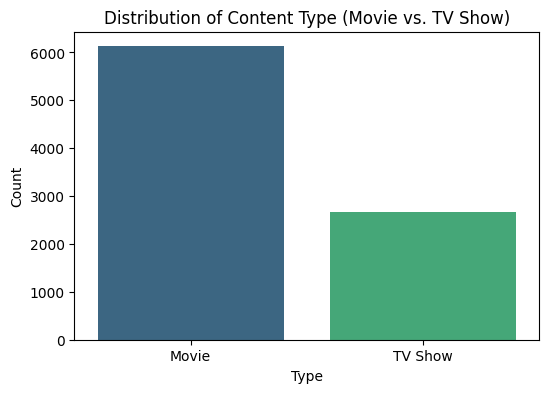

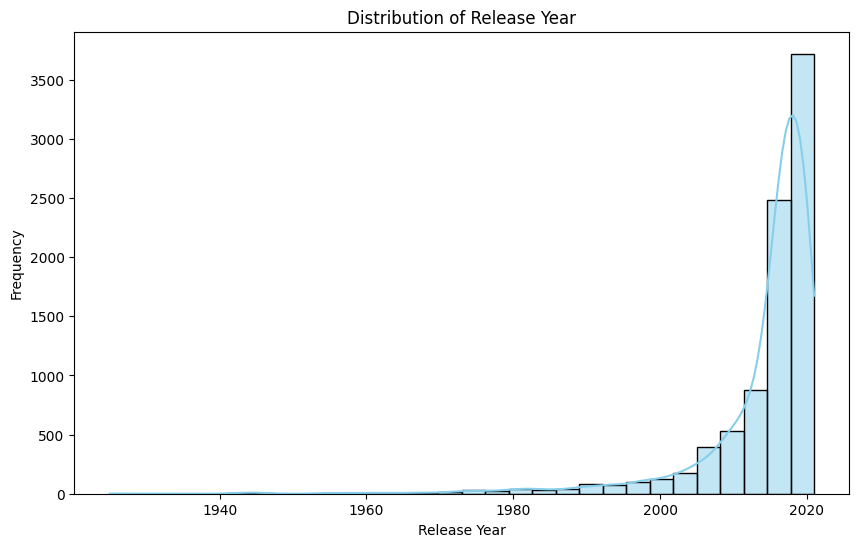

/tmp/ipython-input-2393620045.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country', data=top_countries_df, palette='magma')


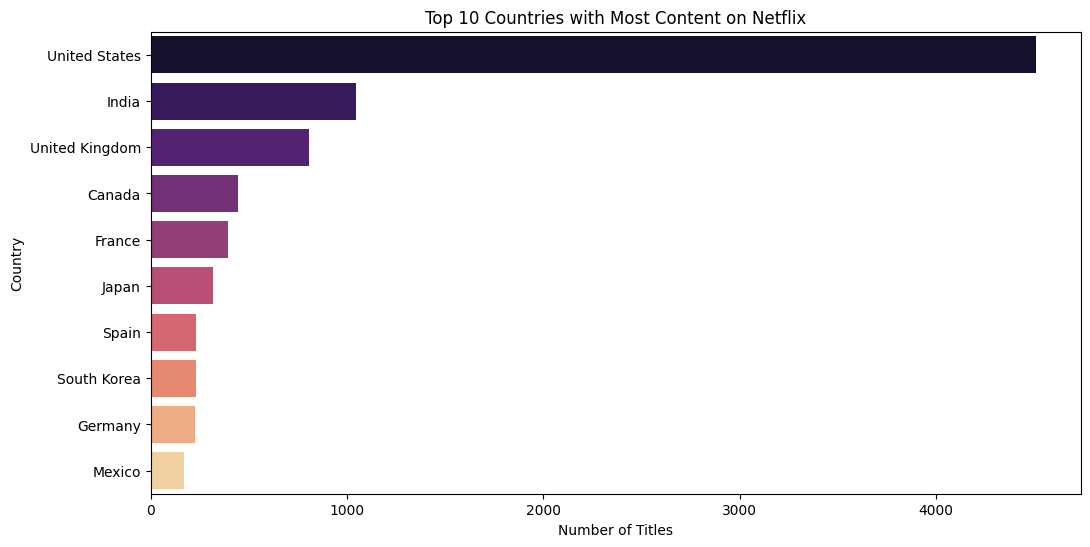

/tmp/ipython-input-2393620045.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=top_genres_df, palette='plasma')


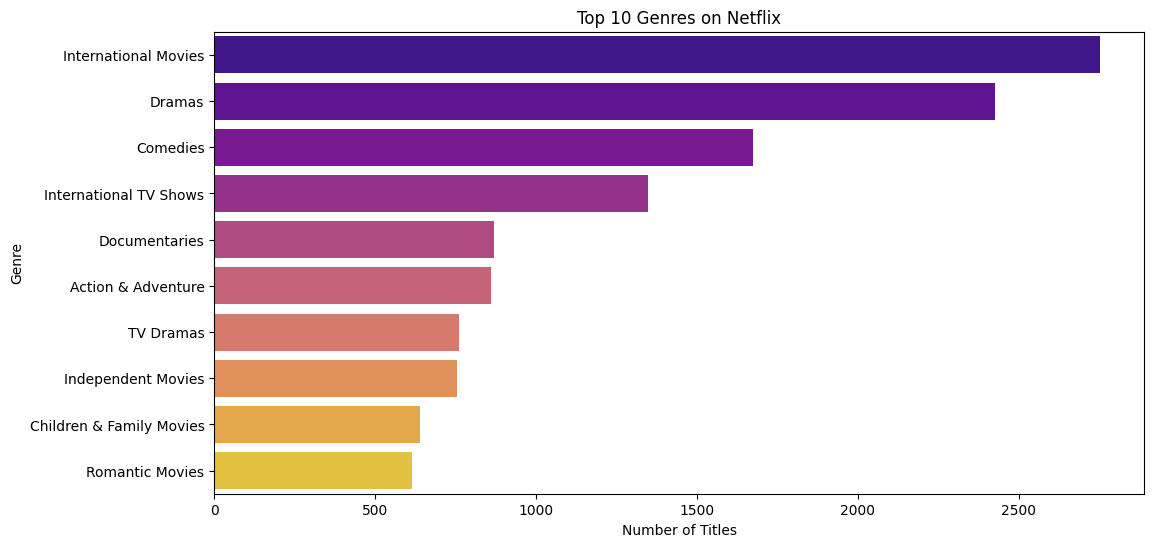

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Distribution of 'type'
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Content Type (Movie vs. TV Show)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Distribution of 'release_year'
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# 3. Top 10 countries with the most content
# Split the country string and count occurrences
country_counts = Counter()
for countries in df['country'].dropna():
    for country in [c.strip() for c in countries.split(',')]:
        country_counts[country] += 1

top_countries = country_counts.most_common(10)
top_countries_df = pd.DataFrame(top_countries, columns=['country', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', data=top_countries_df, palette='magma')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 4. Top 10 genres ('listed_in')
# Split the genre string and count occurrences
genre_counts = Counter()
for genres in df['listed_in'].dropna():
    for genre in [g.strip() for g in genres.split(',')]:
        genre_counts[genre] += 1

top_genres = genre_counts.most_common(10)
top_genres_df = pd.DataFrame(top_genres, columns=['genre', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='genre', data=top_genres_df, palette='plasma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

## Analyze trends

### Subtask:
Analyze trends and patterns in the data, such as the distribution of content types, genres, and release years.


**Reasoning**:
Group the data by release year and type, count the occurrences, pivot the table, and fill missing values with 0 to prepare for plotting the trend of content types over the years.



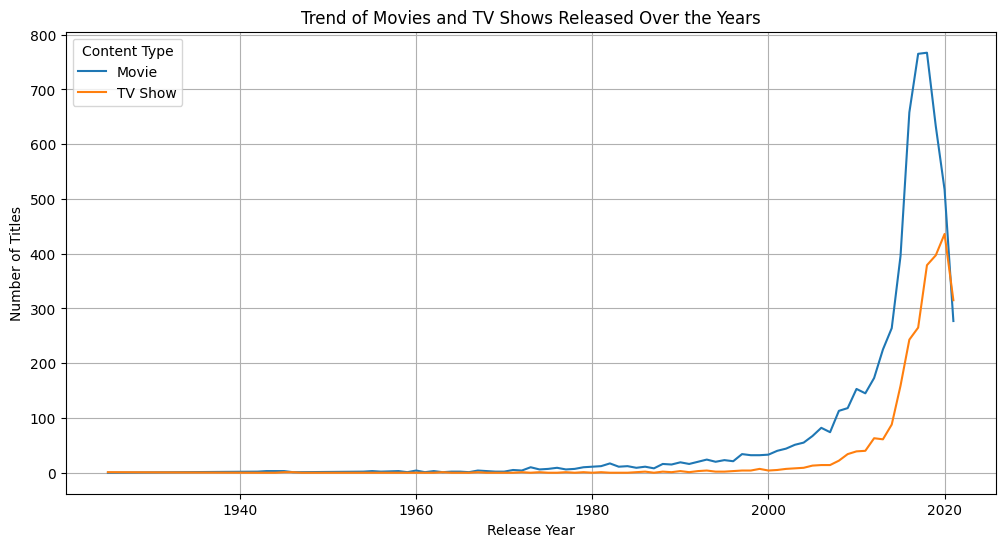

In [7]:
# 1. Group by 'release_year' and 'type' and count titles
yearly_type_counts = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# 2. Pivot the DataFrame
yearly_type_pivot = yearly_type_counts.pivot(index='release_year', columns='type', values='count').fillna(0)

# 3. Create a line plot for the trend of movies and TV shows over the years
plt.figure(figsize=(12, 6))
yearly_type_pivot.plot(kind='line', ax=plt.gca())
plt.title('Trend of Movies and TV Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Reasoning**:
Group the original DataFrame by release year and count the number of titles to visualize the overall trend of content releases over the years.



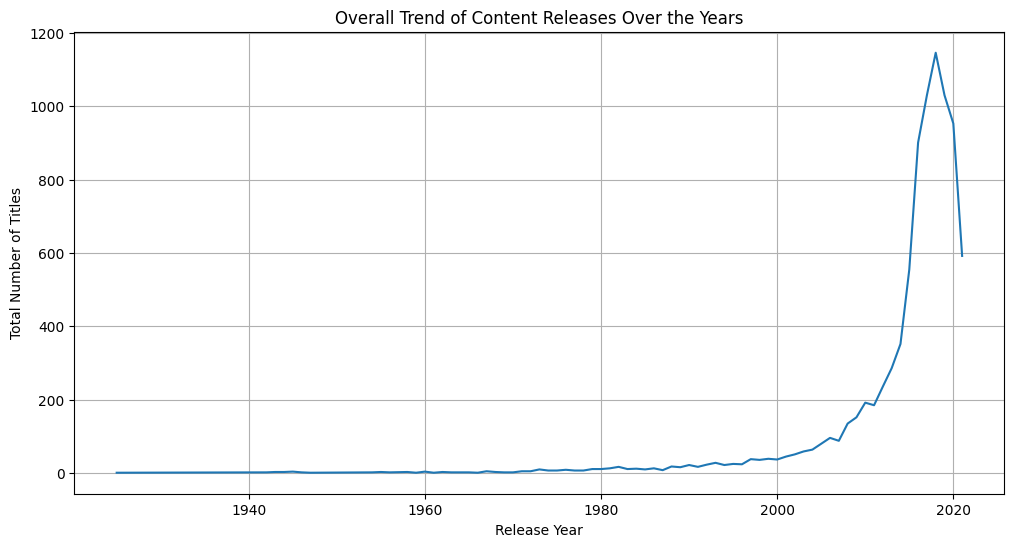

In [8]:
# 4. Group by 'release_year' and count the total number of titles
yearly_total_counts = df.groupby('release_year').size().reset_index(name='count')

# 5. Create a line plot for the overall trend of content releases
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=yearly_total_counts)
plt.title('Overall Trend of Content Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Total Number of Titles')
plt.grid(True)
plt.show()

**Reasoning**:
Extract the top 5 genres, filter the dataframe to include only titles from these genres, count the number of titles per year for each of these genres, and then plot the yearly trend for each of the top 5 genres.



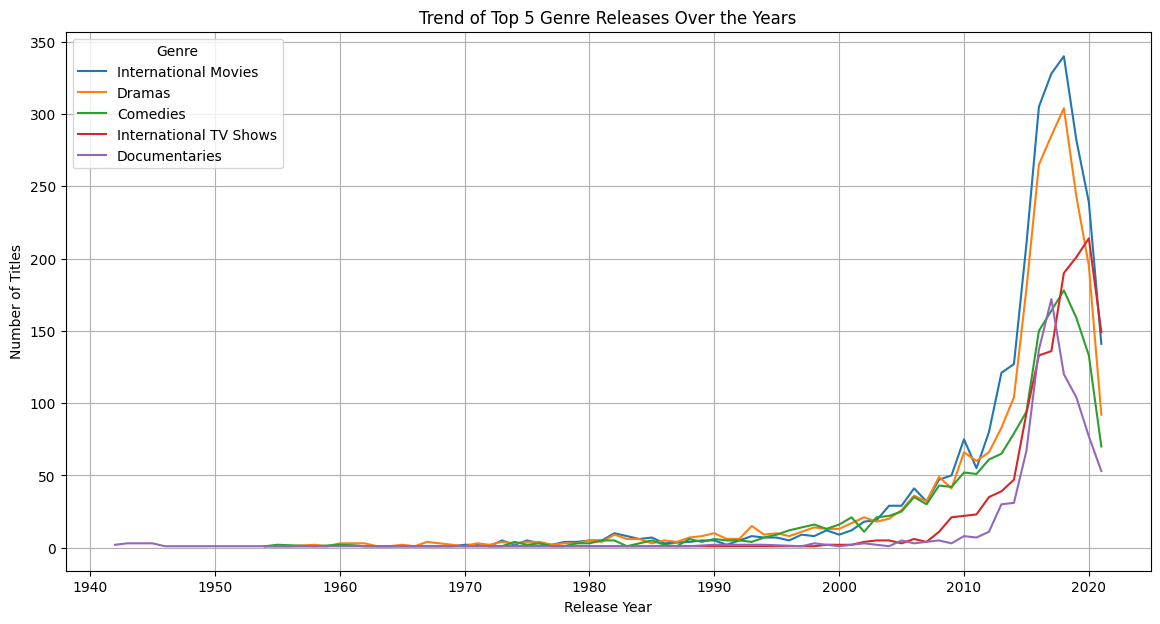

In [9]:
# 6. Extract the top 5 genres
top_5_genres = top_genres_df['genre'].head(5).tolist()

# 7. Filter the DataFrame to include only titles from the top 5 genres
# We need to check if any of the listed_in genres for a title is in the top 5
filtered_df_top_genres = df[df['listed_in'].apply(lambda x: any(genre.strip() in top_5_genres for genre in x.split(',')))]

# 8. For each of the top 5 genres, count the number of titles released per year
genre_yearly_counts = []
for genre in top_5_genres:
    # Filter for the current genre
    genre_df = filtered_df_top_genres[filtered_df_top_genres['listed_in'].apply(lambda x: genre in [g.strip() for g in x.split(',')])]
    # Group by release year and count
    yearly_counts = genre_df.groupby('release_year').size().reset_index(name='count')
    yearly_counts['genre'] = genre
    genre_yearly_counts.append(yearly_counts)

# Concatenate the results
genre_yearly_counts_df = pd.concat(genre_yearly_counts)

# 9. Create a line plot to visualize the trend of releases for each of the top 5 genres
plt.figure(figsize=(14, 7))
sns.lineplot(data=genre_yearly_counts_df, x='release_year', y='count', hue='genre')
plt.title('Trend of Top 5 Genre Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 8807 entries and 12 columns, including one numerical column (`release_year`) and eleven object-type columns.
*   Several columns initially contained missing values, with `director` having the highest percentage (29.91%), followed by `cast` (9.37%) and `country` (9.44%). Missing values in `date_added`, `rating`, and `duration` were minimal (0.11%, 0.05%, and 0.03%, respectively).
*   Missing values were handled by dropping rows with missing `date_added`, `rating`, or `duration`, imputing `cast` and `country` with their modes, and imputing `director` with 'Unknown'.
*   Visualizations showed that there are more Movies than TV Shows in the dataset.
*   The distribution of release years is skewed towards more recent years.
*   The United States has the highest number of content titles on Netflix, followed by India and the United Kingdom.
*   The most frequent genres listed are "Drama", "Comedy", and "Documentaries".
*   Trends over the years show a significant increase in the release of both movies and TV shows, with movies consistently having more releases. The overall content added to Netflix has also increased steadily.
*   The top 5 genres show varying growth trends over the years, indicating shifts in content focus.

### Insights or Next Steps

*   Further analysis could explore the relationship between content type, genre, and rating to understand audience preferences and content strategy.
*   Investigating the trends of content from specific countries could provide insights into regional market strategies.
